### Configurando imports iniciais

In [99]:
%matplotlib inline
import seaborn
import numpy, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 7)

### Carregamento de um arquivo de audio contendo acordes simples de violão

In [100]:
filename = 'audio/simple_guitar2.wav'
x, sr = librosa.load(filename)

### tocando o audio

In [101]:
ipd.Audio(x, rate=sr)

In [102]:
bins_per_octave = 36
cqt = librosa.cqt(x, sr=sr, n_bins=7*12*3, bins_per_octave=bins_per_octave)
print(cqt.shape)

(252, 192)


(0, 446)

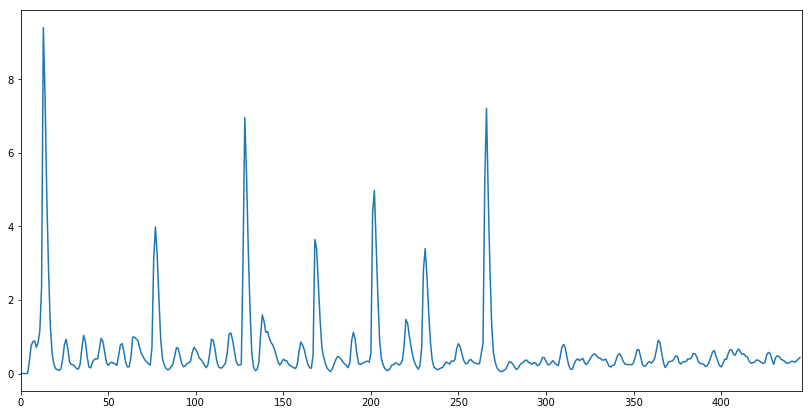

In [103]:
hop_length = int(sr / 100)
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)
plt.plot(onset_env)
plt.xlim(0, len(onset_env))

[    0  2860 16720 27940 36960 44220 50600 58300 97911]
9


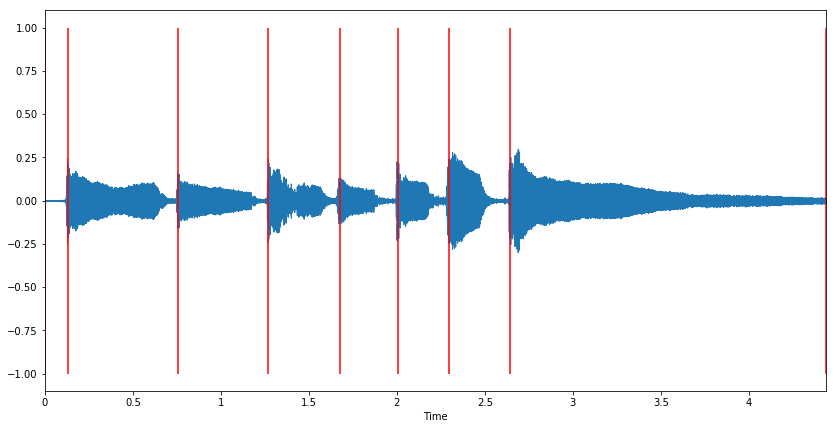

In [104]:
# O parâmetro delta pode ser ajustado (com calma, incrementando 0.05) caso queira obter mais picos...
onset_samples = librosa.onset.onset_detect(x,sr=sr, units='samples', hop_length=hop_length, delta=0.1, wait=1,
                                           pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_boundaries = numpy.concatenate([[0], onset_samples, [len(x)]])
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)
print(onset_boundaries)
print(len(onset_boundaries))
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')

Text(0.5, 1.0, 'Log-frequency power spectrogram')

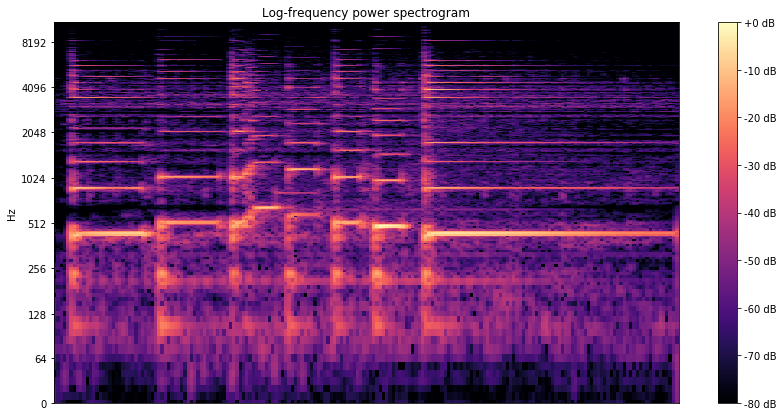

In [105]:
D = librosa.amplitude_to_db(numpy.abs(librosa.stft(x)), ref=numpy.max)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

### Adaptação da função para estimar a frequência de cada salto (pitch)

In [106]:
def estimate_pitch(segment, fmin=20.0, fmax=4000.0):
    
    # Obtenção da autocorrelação do segmento
    r = librosa.autocorrelate(segment)
    
    # Definindo os limites mínimos e máximos para a autocorrelação
    r[:int(sr / fmax)] = 0
    r[int(sr / fmin):] = 0
    
    # Buscando o local da autocorrelação máxima
    i = r.argmax()
    freq = float(sr) / i
    return freq

### Obtendo a frequência máxima por meio de todos os limites encontrados (boundaries)

In [107]:
n = len(onset_boundaries) - 2
notas = list()
for i in range(n):
    n0 = onset_samples[i]
    if i == n - 1:
        freq = estimate_pitch(x[n0:])
    else:
        n1 = onset_samples[i+1]
        freq = estimate_pitch(x[n0:n1])
    notas.append(freq)

# Adicionei está nota só para "avacalhar" e ver se imprime a 7ª nota sustenido a terceira mesmo...
notas.append(184.99)

notas = numpy.array(notas)
print(notas)

[220.5        262.5        130.47337278 580.26315789 259.41176471
 247.75280899 441.         184.99      ]


In [108]:
# Imprimindo as notas
librosa.hz_to_note(notas)

['A3', 'C4', 'C3', 'D5', 'C4', 'B3', 'A4', 'F#3']

### Tabelinha marota para comparar os resultados obtidos

![](http://2.bp.blogspot.com/-T0OuOE1M-hU/UAGLUIpB5oI/AAAAAAAAARk/V-Y4bZYCqWU/s1600/Figura+3+-+Tabela+de+Frequ%25C3%25AAncias+Sonoras+com+7+oitavas.bmp)